<a href="https://colab.research.google.com/github/OtolaHan/Otola_Han_KAAN/blob/main/LabTimeSeries_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

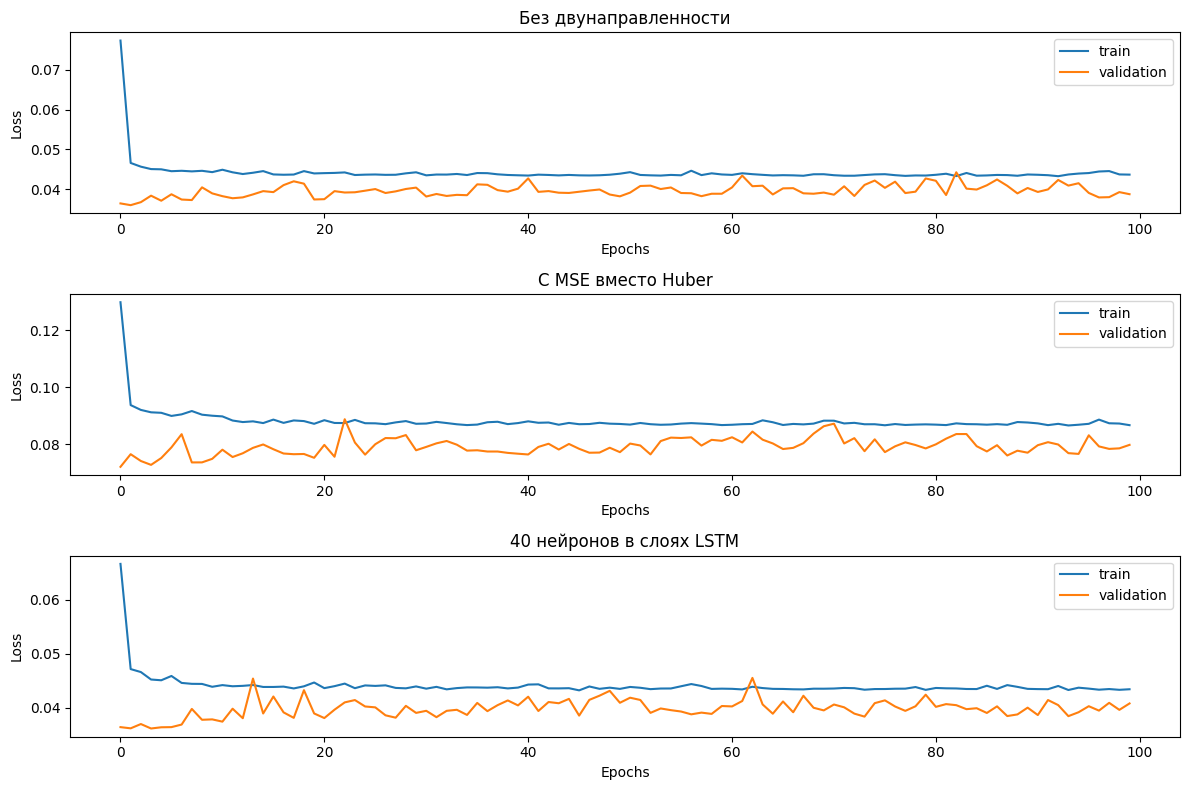

          Model Description  Validation Loss
0     Без двунаправленности         0.038715
1        С MSE вместо Huber         0.079839
2  40 нейронов в слоях LSTM         0.040761


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.losses import Huber, MeanSquaredError

# Генерация случайных данных для примера
def generate_data(n_samples):
    X = np.random.rand(n_samples, 10, 1)  # 10 временных шагов, 1 признак
    y = np.random.rand(n_samples, 1)
    return X, y

# Создание данных
X_train, y_train = generate_data(1000)
X_test, y_test = generate_data(200)

# Модели для экспериментов
models = [
    ("Без двунаправленности", keras.models.Sequential([
        keras.layers.LSTM(50, return_sequences=True, input_shape=[None, 1]),
        keras.layers.LSTM(50),
        keras.layers.Dense(1)
    ])),
    ("С MSE вместо Huber", keras.models.Sequential([
        keras.layers.LSTM(50, return_sequences=True, input_shape=[None, 1]),
        keras.layers.LSTM(50),
        keras.layers.Dense(1)
    ])),
    ("40 нейронов в слоях LSTM", keras.models.Sequential([
        keras.layers.LSTM(40, return_sequences=True, input_shape=[None, 1]),
        keras.layers.LSTM(40),
        keras.layers.Dense(1)
    ]))
]

loss_functions = {
    "Huber": Huber(),
    "MSE": MeanSquaredError()
}

results = []

# Запуск экспериментов и построение графиков
plt.figure(figsize=(12, 8))

for i, (model_name, model) in enumerate(models):
    if "MSE" in model_name:
        model.compile(optimizer='adam', loss=loss_functions["MSE"])
    else:
        model.compile(optimizer='adam', loss=loss_functions["Huber"])

    history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)
    val_loss = history.history['val_loss'][-1]

    results.append({
        "Model Description": model_name,
        "Validation Loss": val_loss
    })

    # Построение графика потерь для каждой модели
    plt.subplot(len(models), 1, i + 1)
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.title(model_name)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

plt.tight_layout()
plt.show()

# Создание и вывод таблицы результатов
results_df = pd.DataFrame(results)
print(results_df)